# Implementación de PCA en NumPy

## Objetivos
* Implementación de PCA en NumPy paso a paso
* Comparación de resultados con Scikit-learn

## Implementación

1. Dado un dataset $X \in \mathbb{R}^{n, d}$, con $n$ muestras y $d$ features, queremos reducir sus dimensiones a $m$ (< $d$). Para ello, el primer paso es centrar el dataset (Hint: usen np.mean)

In [74]:
import numpy as np

X = np.array([[0.8, 0.7], [0.1, -0.1]])
X.mean()
X_centered = X - X.mean()

2. Obtener la matriz de covarianza de $X^T$, revisar en la teoría por qué utilizamos la transpuesta. Buscar en la documentación de NumPy qué funciones se pueden utilizar.

In [75]:
C = np.cov(X_centered.T)

3. Calcular los autovalores y autovectores de la matriz de covarianza. Revisar la documentación de NumPy.

Ej.: 

`np.linalg.eig(X)` resulta:

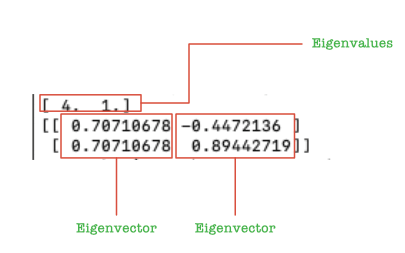

In [76]:
# Ahora calculamos los avas y aves de la matriz de covarianza
avas, aves = np.linalg.eig(C)

4. Ordenar los autovectores en el sentido de los autovalores decrecientes, revisar la teoría de ser necesario.




In [80]:
indexes = np.argsort(avas)[::-1]
aves = aves.T
aves_sorted = aves[0:1]

aves_sorted

array([[-0.75257669, -0.65850461]])

5. Proyectar el dataset centrado sobre los $m$ autovectores más relevantes (Hint: usen np.dot).

In [84]:
np.dot(X_centered, aves_sorted.T)


array([[-0.53385909],
       [ 0.51974828]])

6. Consolidar los pasos anteriores en una función o clase PCA.

In [94]:
class PCA_Pablo:
    
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):       
        # Step 1: mean
        X = X - np.mean(X)
        
        # Step 2: covariance matrix
        C = np.cov(X.T)
        
        # Step 3: avas and aves from the covariance matrix
        avas, aves = np.linalg.eig(C)
        
        # Step 4: sort in decreasing order the aves
        indexes = np.argsort(avas)[::-1]
        
        # Step 5: store first n aves (must transpose first)
        aves = aves.T
        self.components = aves[indexes][0:self.n_components]
                
    def transform(self, X):
        # Step 1: center again the dataset
        X = X - np.mean(X)
        
        # Step 2: project X over the components
        # we transpose the components again in order to match
        # the dot product dimensions
        return np.dot(X, self.components.T)

def main():
    X = np.array([[0.8, 0.7],[0.1,-0.1]])
    p = PCA(n_components=1)
    p.fit(X)
    X_proj = p.transform(X)
    print(X_proj)
    
main()
        

[[-0.53150729]
 [ 0.53150729]]


7. Comparar los resultados obtenidos con el modelo de PCA implementado en Scikit-learn ([ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Tomar como dataset:

$X=\begin{bmatrix}
0.8 & 0.7\\
0.1 & -0.1
\end{bmatrix}$

Se debe reducir a un componente. Verificar los resultados con np.testing.assert_allclose

In [97]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[0.8, 0.7],[0.1,-0.1]])

# sklearn's PCA implementation
pca = PCA(n_components=1)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj)

# Homemade PCA implementation
pca_pablo = PCA_Pablo(n_components=1)
pca_pablo.fit(X)
X_proj_pablo = pca_pablo.transform(X)
print(X_proj_pablo)

np.testing.assert_allclose(X_proj, X_proj_pablo, rtol=0.2)


[[-0.53150729]
 [ 0.53150729]]
[[-0.52445188]
 [ 0.5385627 ]]


# Bibliography

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://www.youtube.com/watch?v=52d7ha-GdV8

